#Introduction to Neural Network classification with TensorFlow

A classification where you try to classify something as one thing or another
A few types of classification problems:
* Binary Classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

#Make 1000 examples
n_sample=1000

#Create circles
X,y = make_circles(n_sample,
                   noise=0.03,
                   random_state=42)

In [ ]:
#Checking out features and Lavels
X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

## Step 1: Visualise Data

In [ ]:
#Visualise in Dataframe
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


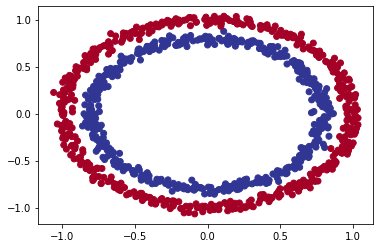

In [ ]:
#Visualise with a plot
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

## Input and output shapes


In [ ]:
#Checking Shapes and Length
X.shape, y.shape, len(X), len(y), X[0:7], y[0:7]

((1000, 2), (1000,), 1000, 1000, array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343],
        [-0.47964637,  0.67643477],
        [-0.01364836,  0.80334872]]), array([1, 1, 1, 1, 0, 1, 1]))

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.7.0


# Steps in Modelling

1. Create or import model
2. Compile the model
3. Fit the model
4. Evalute teh model
5. Tweak
6. Evaluate

### Model 1

In [ ]:
#Set random seed
tf.random.set_seed(42)

#1. Creat model using Sequential API
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1)
])

#2. Compile the model
model_1.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy']
                )

#3. Fit the model
model_1.fit(X,y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4830


In [ ]:
# Train the model longer
model_1.fit(X,y, epochs=200, verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

### Tweaking the model to improve measurements

Since adjusting epochs is not impoving the model. We will consider adding more layers.

### Model 2

In [ ]:
#Set random seed
tf.random.set_seed(42)

#1. Creat model using Sequential API
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1),
                               tf.keras.layers.Dense(1)
])

#2. Compile the model
model_2.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy']
                )

#3. Fit the model
model_2.fit(X,y, epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 1ms/step - loss: 1.8044 - accuracy: 0.5090
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7235 - accuracy: 0.5030
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7145 - accuracy: 0.4950
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7078 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7037 - accuracy: 0.5010


In [ ]:
#4. Evaluate the model
model_2.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.7018 - accuracy: 0.4980


[0.7018194198608398, 0.49799999594688416]

###  More Improvement to the models

- Increasing layers
- Increasing number of units
- Changing from SGD to Adam
- Fitting a model

### Model 3

In [ ]:
#Set random seed
tf.random.set_seed(42)

#1. Creat model using Sequential API
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100), #Add 100 dense neurons
                               tf.keras.layers.Dense(10), #Add another layer with 10 neurons
                               tf.keras.layers.Dense(1),
])

#2. Compile the model
model_3.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy']
                )

#3. Fit the model
model_3.fit(X,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 2.9658 - accuracy: 0.4490
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7229 - accuracy: 0.4390
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6971 - accuracy: 0.4700
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.4620
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4750
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4750
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.5040
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.4980
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4880
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.4480
Epoch 11/

In [ ]:
#4. Evaluate the model
model_3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980254650115967, 0.5080000162124634]

- Take in trained model, features (X) and labels(y)
- Create a meshgrid of different X values
- Make predictions across the meshgrid
- Plot the predictions as well as a ling between zones (where each unique class falls)

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classifcation...


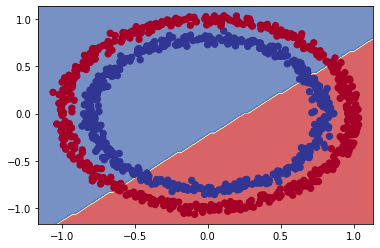

In [ ]:
plot_decision_boundary(model=model_3, X=X, y=y)

In [ ]:
  x_min, x_max= X[:,0].min() - 0.1, X[:,0].max()+0.1
  y_min, y_max= X[:,].min() - 0.1, X[:,0].max()+0.1

  x_min, x_max

  xx, yy = np.meshgrid(np.linspace(x_min, x_max,100),
                       np.linspace(y_min, y_max, 100))
  x_in = np.c_[xx.ravel(), yy.ravel()]

xx,yy

(array([[-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        ...,
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175]]),
 array([[-1.16776832, -1.16776832, -1.16776832, ..., -1.16776832,
         -1.16776832, -1.16776832],
        [-1.14452104, -1.14452104, -1.14452104, ..., -1.14452104,
         -1.14452104, -1.14452104],
        [-1.12127377, -1.12127377, -1.12127377, ..., -1.12127377,
         -1.12127377, -1.12127377],
        ...,
        [ 1.08721721,  1.08721721,  1.08721721, ...,  

In [ ]:
#Testing on Regression problem

tf.random.set_seed(42)

#Create some regression data
X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5)

#Splite our regression data into training and test sets

X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# #Fit the model into regression data
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

In [ ]:
#setup random seed
tf.random.set_seed(42)

#1. Create the model
model_3 = tf.keras.Sequential([
                                     tf.keras.layers.Dense(100),
                                     tf.keras.layers.Dense(10),
                                     tf.keras.layers.Dense(1)
                                     
])

#2. compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer= tf.keras.optimizers.Adam(),
                metrics=['mae'])

#3 Fit the model

model_3.fit(tf.expand_dims(X_reg_train, axis= -1),y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 45.9386 - mae: 45.9386
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 43.6831 - mae: 43.6831
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 [==============================] - 0s 

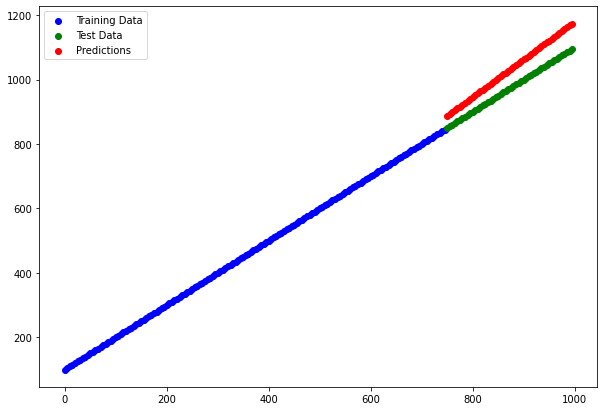

In [ ]:
# Make predictions with trained model
y_reg_preds = model_3.predict(X_reg_test)

#Plot the model's prediction against out regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c= 'b', label='Training Data')
plt.scatter(X_reg_test, y_reg_test, c= 'g', label='Test Data')
plt.scatter(X_reg_test, y_reg_preds, c= 'r', label='Predictions')
plt.legend();


Missing Piece: Non-linearity


In [ ]:
#set the random seed
tf.random.set_seed(42)

#1. Create the model
model_4= tf.keras.Sequential([
                              tf.keras.layers.Dense(1, activation= tf.keras.activations.linear)
])

#2. Comile the model
model_4.compile(loss="binary_crossentropy",
                optimizer= tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

#3. Fit the model
history=model_4.fit(X,y, epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7547 - accuracy: 0.4150
Epoch 11/

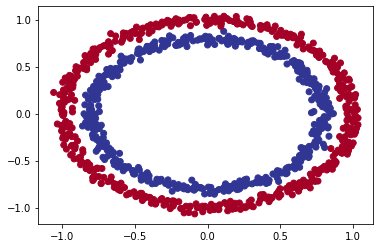

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

doing binary classifcation...


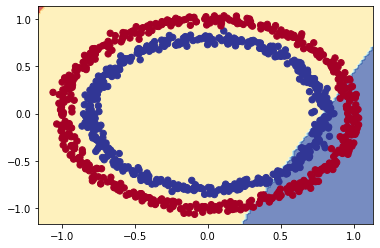

In [ ]:
plot_decision_boundary(model=model_4, X=X, y=y)

Building with non-linear activation

In [ ]:
#set the random seed
tf.random.set_seed(42)

#1. Create the model
model_5= tf.keras.Sequential([
                              tf.keras.layers.Dense(1, activation= tf.keras.activations.relu)
])

#2. Comile the model
model_5.compile(loss="binary_crossentropy",
                optimizer= tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

#3. Fit the model
history=model_5.fit(X,y, epochs=100) 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7547 - accuracy: 0.4150
Epoch 11/

In [ ]:
#Replication of Playground Setup
#set the random seed
tf.random.set_seed(42)

#1. Create the model
model_6= tf.keras.Sequential([
                              tf.keras.layers.Dense(4, activation= tf.keras.activations.relu),
                              tf.keras.layers.Dense(4, activation= tf.keras.activations.relu),
                              tf.keras.layers.Dense(1, activation= tf.keras.activations.relu)
])

#2. Comile the model
model_6.compile(loss="binary_crossentropy",
                optimizer= tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

#3. Fit the model
history=model_6.fit(X,y, epochs=250) 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

doing binary classifcation...


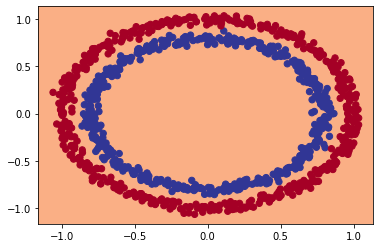

In [ ]:
plot_decision_boundary(model=model_6, X=X, y=y)

In [ ]:
#Replication of Playground Setup
#set the random seed
tf.random.set_seed(42)

#1. Create the model
model_7= tf.keras.Sequential([
                              tf.keras.layers.Dense(4, activation= tf.keras.activations.relu),
                              tf.keras.layers.Dense(4, activation= tf.keras.activations.relu),
                              tf.keras.layers.Dense(1, activation= tf.keras.activations.sigmoid)
])

#2. Comile the model
model_7.compile(loss="binary_crossentropy",
                optimizer= tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

#3. Fit the model
history=model_7.fit(X,y, epochs=100) 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/

In [ ]:
#Evaluate the Model
model_7.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.2948 - accuracy: 0.9910


[0.2948004901409149, 0.9909999966621399]

doing binary classifcation...


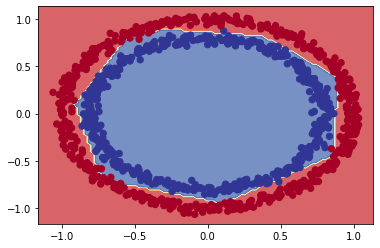

In [ ]:
plot_decision_boundary(model=model_7
                       , X=X, y=y)

### Toy Tensor

In [ ]:
#Creating toy tensor

A= tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

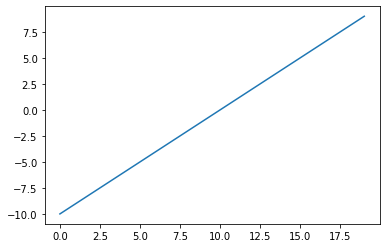

In [ ]:
#Visuallise tensor
plt.plot(A)

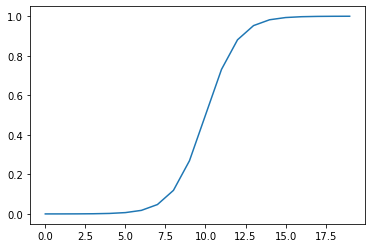

In [ ]:
#Replicating Sigmoid

def sigmoid(x):
  return 1/(1+tf.exp(-x))

plt.plot(sigmoid(A))


In [ ]:
#Relu Function

def relu(x):
  return tf.maximum(0,x)

tf.maximum

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

# Evaluating and Improving our Classifications

In [ ]:
X,y

#Split into train and Test Sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
#set the random seed
tf.random.set_seed(42)

#1. Create the model
model_8= tf.keras.Sequential([
                              tf.keras.layers.Dense(4, activation= tf.keras.activations.relu),
                              tf.keras.layers.Dense(4, activation= tf.keras.activations.relu),
                              tf.keras.layers.Dense(1, activation= tf.keras.activations.sigmoid)
])

#2. Comile the model
model_8.compile(loss="binary_crossentropy",
                optimizer= tf.keras.optimizers.Adam(lr=0.01),
                metrics=['accuracy'])

#3. Fit the model
history=model_8.fit(X_train,y_train, epochs=25) 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/25
25/25 [

In [ ]:
#4. Evaluate the model on the test dataset

model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000


[0.1246885135769844, 1.0]

doing binary classifcation...
doing binary classifcation...


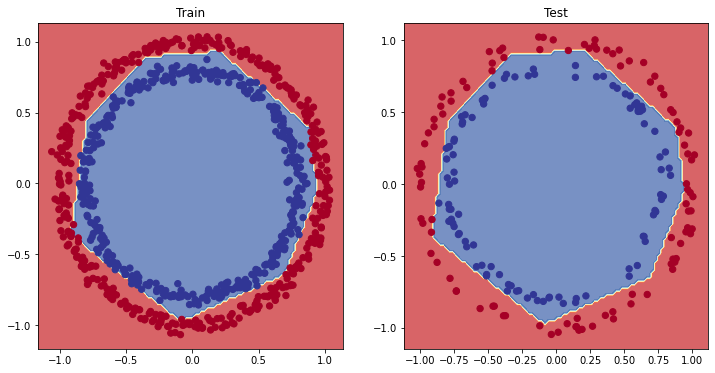

In [ ]:
#Comparing the two models
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y= y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)

Text(0.5, 1.0, 'Model 8 Loss Curves')

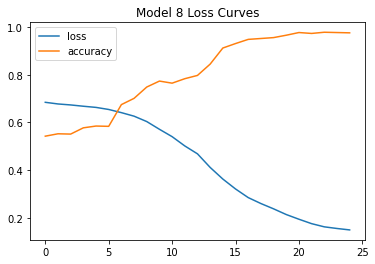

In [ ]:
#Plotting lost curve
pd.DataFrame(history.history).plot()
plt.title("Model 8 Loss Curves")

**Note:** With loss function going down it is a sign that hte model is improving. 

# Finding the Best Learning Rate

To find the Ideal learning rate where the losses decreases the most during training.

- a learning rate **callback** - extra piece of f(x) added to the model while training
- another model 
- modified loss curve plots


In [ ]:
#Set random seed
tf.random.set_seed(42)

#Create a model (same as model 8)
model_9= tf.keras.Sequential([
                              tf.keras.layers.Dense(4, activation="relu"),
                              tf.keras.layers.Dense(4, activation="relu"),
                              tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

#Create a learning rate callback

lrs= tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4 *10**(epoch/20))

#Fit the model
history9 = model_9.fit(X_train,
                      y_train,
                      epochs=100,
                      callbacks=[lrs])

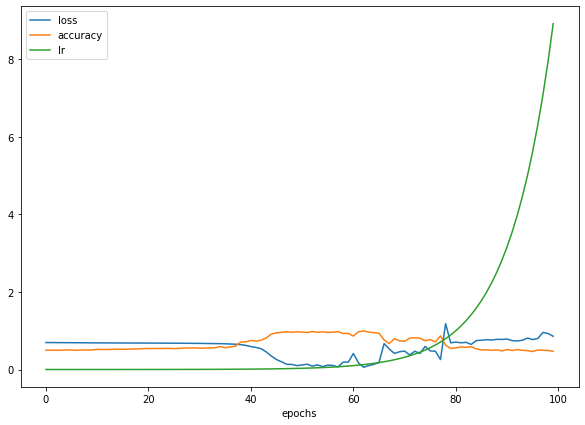

In [ ]:
#Checking on history
pd.DataFrame(history9.history).plot(figsize=(10,7), xlabel="epochs")

Text(0, 0.5, 'Loss')

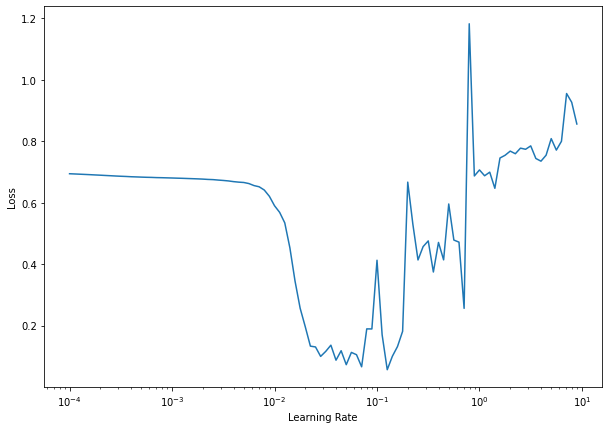

In [ ]:
lrsp = 1e-4* (10**(tf.range(100)/20))
lrsp

plt.figure(figsize= (10,7))
plt.semilogx(lrsp, history9.history['loss'])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")

In [ ]:
#Set random seed
tf.random.set_seed(42)

#Create model
model10= tf.keras.Sequential([
                              tf.keras.layers.Dense(4, activation='relu'),
                              tf.keras.layers.Dense(4, activation='relu'),
                              tf.keras.layers.Dense(1, activation='sigmoid'),
])

#Compile the model
model10.compile(loss='binary_crossentropy',
                optimizer= tf.keras.optimizers.Adam(lr=0.02),
                metrics=['accuracy'])
#Fit the model for 20 epochs
history10 = model10.fit(X_train, y_train, epochs= 25)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/25
25/25 [

In [ ]:
#Evaluate the model 10 on test data

model_8.evaluate(X_test,y_test), model10.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0463 - accuracy: 0.9900


([0.1246885135769844, 1.0], [0.046285759657621384, 0.9900000095367432])

doing binary classifcation...
doing binary classifcation...


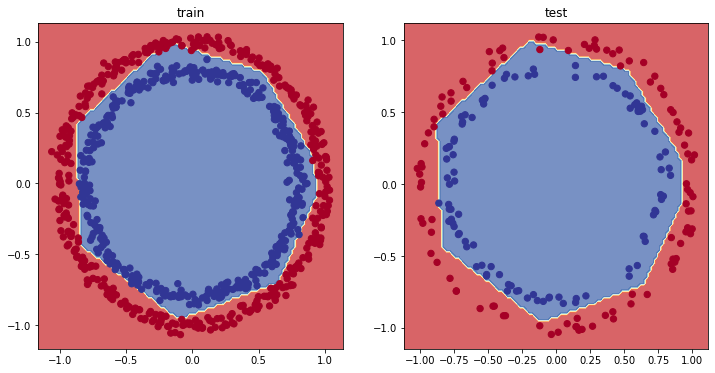

In [ ]:
# Plot decision boundaries for the train and test sets

plt.figure(figsize= (12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model10, X= X_train, y= y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model10, X= X_test, y= y_test)
plt.show()

## Classification evaluation methods 

1. Accuracy
2. Precision
3. Recall
4. F1-score
5. COnfusion matrix
6. Classification Report (from scikit-learn)

In [ ]:
#Check the accuracy of our model

loss, accuracy = model10.evaluate(X_test, y_test)
print(f"Model loss on the test set:{loss}")
print(f"Model accuracy on the test set:{(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.0463 - accuracy: 0.9900
Model loss on the test set:0.046285759657621384
Model accuracy on the test set:99.00%


# Confusion Matrix

In [ ]:
#Creating Confusion Matrix using Scikit-learn
from sklearn.metrics import confusion_matrix

# Make Predictions
y_preds = model10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test,tf.round(y_preds))

array([[100,   1],
       [  1,  98]])

Formatting the confusion matrix


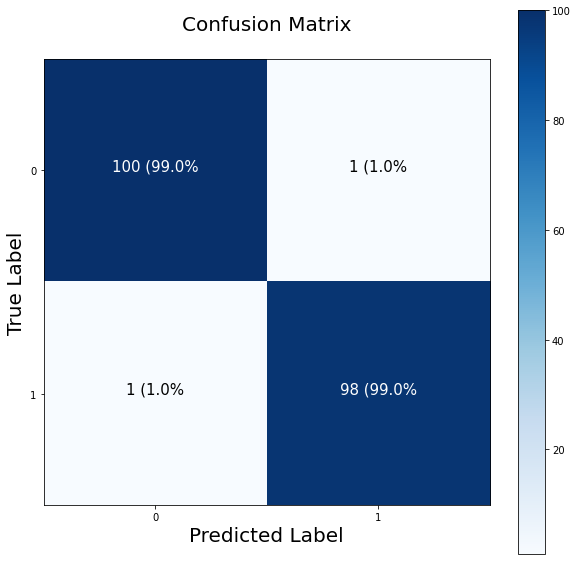

In [ ]:
import itertools

figsize= (10,10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]


#Formnatting Matrix
fig, ax = plt.subplots(figsize=figsize)
#Creating a matrix plot
cax= ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

#Create classes
classes = False
if classes: 
  labels = classes
else:
  labels = np.arange(cm.shape[0])

#Label the axes
ax.set(title='Confusion Matrix',
       xlabel ='Predicted Label',
       ylabel= 'True Label',
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels= labels,
       yticklabels= labels
       )

#Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

#Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

#Set threshold for different colours
threshold = (cm.max()+ cm.min())/2.

#Plot the text on each cell

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%",
           horizontalalignment='center',
           color='white' if cm[i,j] > threshold else 'black', size=15)

#Working with Multiclass examples

More than two classes options, it will be known as **multiclass classifications**

- Buildingd multi-class classification using images of clothing, fashion_mnist dataset

In [16]:
#Importing Libs and loading dataset
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

#Dataset downloaded has already been sorted into training and test sets
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

###Checking the dataset example 1

In [17]:
#Show the first training example

print(f'Training sample:\n {train_data[0]}\n')
print(f'Training label:\n{train_labels[0]}\n')



Training sample:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

### Checking the shape of a single example

In [18]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

### Ploting sample to visualise and Checking label

2


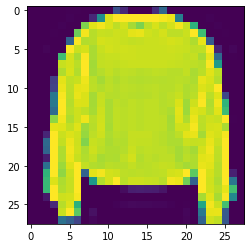

In [19]:
import matplotlib.pyplot as plt

plt.imshow(train_data[7])
print(train_labels[7])

### Importing label names (classes)

In [20]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Check on total number of classes
len(class_names)

10

### Plotting a sample image to visualise

Text(0.5, 1.0, 'Bag')

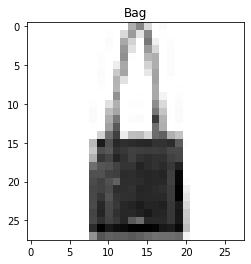

In [21]:
# Plotting Single Selected Image

indexchoice= 200

plt.imshow(train_data[indexchoice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[indexchoice]])

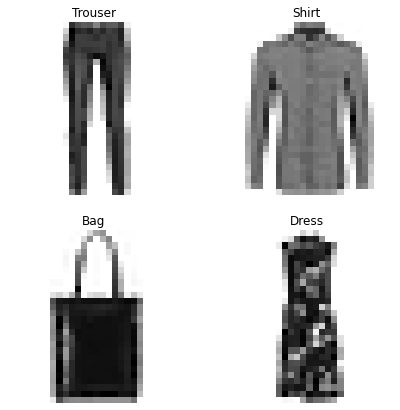

In [22]:
#Plotting four random images

import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax=plt.subplot(2,2,i+1)
  randindex= random.choice(range(len(train_data)))
  plt.imshow(train_data[randindex], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[randindex]])
  plt.axis(False)

Building multi-class models (Models with more than 2 output labels)

- Input shape = 28x28 per image
- Output shape = 10 (one per class of clothing)
- Loss function = tf.keras.losses
  - CategoricalCrossentropy() : if your labels are one-hot encoded
  - SparseCategoricalCrossentropy() : if your labels are more than two different values
- Output layer activation = Softmax


In [23]:
#Set random seed

tf.random.set_seed(42)

#Create model 
model11= tf.keras.Sequential([
                              tf.keras.layers.Flatten(input_shape=(28,28)),
                              tf.keras.layers.Dense(4, activation = 'relu'),
                              tf.keras.layers.Dense(4, activation = 'relu'),
                              tf.keras.layers.Dense(10, activation= tf.keras.activations.softmax)
])

#Compile model
model11.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(), #SparseCategoricalCrossentropy is use when onehot data is not applied. 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

#Fit the model
nnhistory = model11.fit(train_data,
                        train_labels,
                        epochs=10,
                        validation_data= (test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

In [24]:
 #Check model summary
 model11.summary() 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 4)                 3140      
                                                                 
 dense_7 (Dense)             (None, 4)                 20        
                                                                 
 dense_8 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [25]:
#Checking min and max of data

train_data.min(), train_data.max()

(0, 255)

In neural network, they work better with normalised data. This means having the number between 0 to 1.

We will need to normalise the data by dividing all the data by the max value of the dataset.

In [26]:
#Normalising the dataset
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0



train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [27]:
# Creating a model with normlised data

#Set random seed

tf.random.set_seed(42)

#Create model 
model12= tf.keras.Sequential([
                              tf.keras.layers.Flatten(input_shape=(28,28)),
                              tf.keras.layers.Dense(4, activation = 'relu'),
                              tf.keras.layers.Dense(4, activation = 'relu'),
                              tf.keras.layers.Dense(10, activation= 'softmax')
])

#Compile model
model12.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(), #SparseCategoricalCrossentropy is use when onehot data is not applied. 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

#Fit the model
normhistory = model12.fit(train_data_norm,
                        train_labels,
                        epochs=10,
                        validation_data= (test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

By comparing model 11 and 12 (non-normalised vs normalised) has shown significant improvements to the accuracy. 

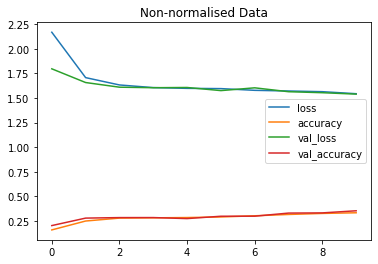

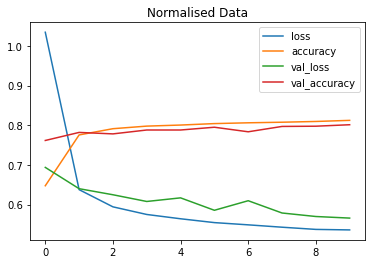

In [28]:
import pandas as pd

#Plot non-normalised data loss curves
pd.DataFrame(nnhistory.history).plot(title= "Non-normalised Data")
#Plot normalised data loss curves
pd.DataFrame(normhistory.history).plot(title='Normalised Data')

## Finding the ideal learning rate

In [36]:
#Set random seed
tf.random.set_seed(42)

#Create the model
model13= tf.keras.Sequential([
                              tf.keras.layers.Flatten(input_shape=(28,28)),
                              tf.keras.layers.Dense(4,activation='relu'),
                              tf.keras.layers.Dense(4,activation='relu'),
                              tf.keras.layers.Dense(10,activation='softmax'),
                                                    
])
                              
#Compile model
model13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

#Create learning rate callback
lrs = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

#Fit the model
findlrhistory = model13.fit(train_data_norm,
                            train_labels,
                            epochs=40,
                            validation_data=(test_data_norm, test_labels),
                            callbacks = [lrs])

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'Finding the ideal learning rate')

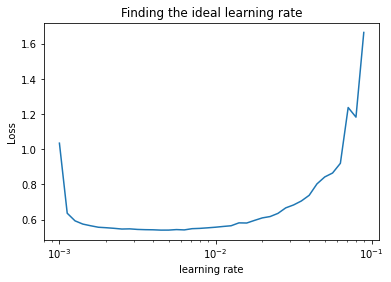

In [41]:
# Plot learning rate decay curve.

import numpy as np
import matplotlib.pyplot as plt

lrss = 1e-3*(10**(tf.range(40)/(20)))
plt.semilogx(lrss, findlrhistory.history['loss'])
plt.xlabel("learning rate")
plt.ylabel('Loss')
plt.title('Finding the ideal learning rate')

Refitting the model with the best learing rate

In [47]:
#Set seed
tf.random.set_seed(42)

#Create the model
model14 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape = (28,28)),
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(10, activation='softmax')
])

#Compile the model

model14.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(lr=0.001),
                metrics = ['accuracy'])

#Fit the model
history14 = model14.fit(train_data_norm,
                        train_labels,
                        epochs =20,
                        validation_data = (test_data_norm, test_labels))


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

## Evaluating multi-class classification model

To evaluate the model:
- Evaluate its performance using other classification metrics -> Confusion matrix
- Assess some of the predictions (through visualisations)
- Improve its results (by training it for longer or chaning the architecture) 
- Save and export for use in an application

In [60]:
#Creating matrix
import itertools
from sklearn.metrics import confusion_matrix


def make_confusion_matrix(y_true, y_pred, classes = None, figsize= (10,10), text_size=15):
  # Create the confusion matrix
  cm = confusion_matrix(y_true, tf.round(y_preds))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize=figsize)

  #Creating a matrix plot
  cax= ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  #Set labels to be classes
  if classes: 
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  #Label the axes
  ax.set(title='Confusion Matrix',
        xlabel ='Predicted Label',
        ylabel= 'True Label',
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels= labels,
        yticklabels= labels
        )

  #Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  #Adjust label size
  ax.xaxis.label.set_size(text_size)
  ax.yaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  #Set threshold for different colours
  threshold = (cm.max()+ cm.min())/2.

  #Plot the text on each cell

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%",
            horizontalalignment='center',
            color='white' if cm[i,j] > threshold else 'black', size=text_size
             )

In [49]:
#Remember to make predictions on the same type of data it was trained on. If it was trained on normalised used the normalised test data
#Make predictions with our model
y_probs = model14.predict(test_data_norm) 

y_probs[:5]

array([[8.56299753e-11, 3.53615629e-13, 2.66337556e-05, 4.63562024e-08,
        5.09498605e-05, 9.61192474e-02, 8.17780403e-08, 9.18688551e-02,
        4.06052778e-03, 8.07873666e-01],
       [3.42785552e-06, 1.28992649e-16, 9.59891498e-01, 2.05162564e-07,
        1.53292371e-02, 2.45320095e-13, 2.41428725e-02, 1.13834485e-28,
        6.32718089e-04, 4.47896404e-08],
       [6.10630595e-05, 9.96576726e-01, 4.38669758e-08, 3.34058981e-03,
        1.32494861e-05, 1.43831603e-21, 8.27906115e-06, 7.32374630e-18,
        5.48116041e-08, 4.92251402e-14],
       [7.50314357e-05, 9.90536869e-01, 4.25285322e-07, 9.22318175e-03,
        1.36231421e-04, 1.82760903e-18, 2.68082422e-05, 4.81248308e-14,
        1.45215904e-06, 2.22114601e-11],
       [7.21899569e-02, 1.54957536e-06, 2.55668938e-01, 1.03631355e-02,
        4.35413495e-02, 1.10693023e-13, 6.16930187e-01, 6.75438989e-23,
        1.30491622e-03, 1.21404065e-09]], dtype=float32)

In [51]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([8.5629975e-11, 3.5361563e-13, 2.6633756e-05, 4.6356202e-08,
        5.0949860e-05, 9.6119247e-02, 8.1778040e-08, 9.1868855e-02,
        4.0605278e-03, 8.0787367e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [56]:
#Converting all predictions probablities into integers
y_preds= y_probs.argmax(axis=1)

#View first 10 predictions labels
y_preds[:10]

NameError: ignored

In [57]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, y_pred=y_preds)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

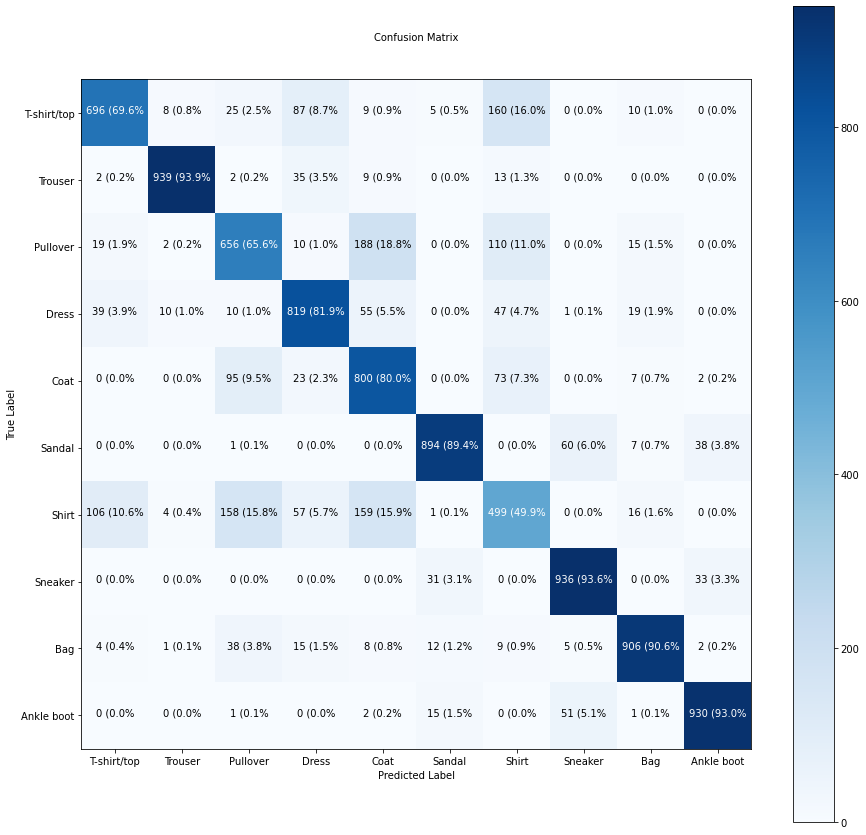

In [61]:
#Make better visual confusion matrix
make_confusion_matrix(y_true = test_labels, y_pred=y_preds, classes=class_names, figsize=(15,15), text_size=10)

Creating Function to:
- Plot random image
- Make prediction on said image
- Label plot with truth label and the predicted label

In [78]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth labels

  """
  # Set up random integer
  i = random.randint(0, len(images))

  #Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  #Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  #Change colour of header
  if pred_label == true_label:
    color='green'
  else:
    color = 'red'

  #Add x label info (prediction/true label)
  plt.xlabel("pred:{} {:1.0f}% (True: {})".format(pred_label,
                                                  100*tf.reduce_max(pred_probs),
                                                  true_label), 
             color=color) #set color to green or red based on prediction right or wrong

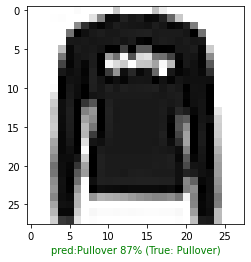

In [80]:
#Checking on random image and prediction

plot_random_image(model=model14,
                  images=test_data_norm,
                  true_labels= test_labels,
                  classes=class_names)

## Getting the patterns of the model (weights)

In [82]:
#Get the patterns of a layer in ou rnetwork

weights, biases = model14.layers[1].get_weights()

#Shapes 
weights, weights.shape

(array([[ 0.7150263 , -0.06077093, -0.99763095, -1.0484313 ],
        [ 0.2773212 , -0.471554  , -0.52916455,  0.02329255],
        [ 0.7752433 ,  0.5402759 , -1.128857  , -0.7426156 ],
        ...,
        [-0.3945342 ,  0.47628632, -0.2264153 ,  0.2550593 ],
        [-0.40515798,  0.61810046,  0.23928414, -0.50387603],
        [ 0.23884593,  0.11606961, -0.12131374,  0.04352392]],
       dtype=float32), (784, 4))

## Checking on Bias Factors

In [83]:
# Get bias and biases shapes
biases, biases.shape

(array([ 2.4485964e-02, -6.1471871e-04, -2.7230152e-01,  8.1124878e-01],
       dtype=float32), (4,))

#Viewing the model


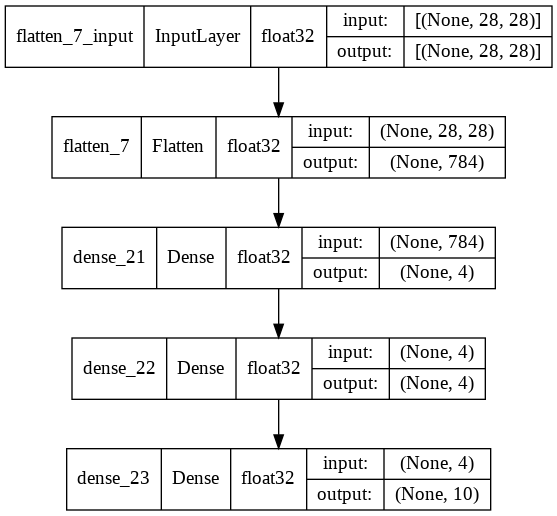

In [87]:
from tensorflow.keras.utils import plot_model


plot_model(model14, show_shapes=True,show_dtype=True )